In [1]:
from Model3 import RiverDeltaModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
import copy
import matplotlib.lines as mlines

c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:24: SyntaxWarning: invalid escape sequence '\D'
  correct_path = path + "\Data\model_input_data_823.xlsx"
c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:379: SyntaxWarning: invalid escape sequence '\d'
  path_salinity = path + "\\Data\districts_salinity.gpkg"
c:\Users\sjuul\OneDrive\Documenten\EPA\THESIS\Thesis\Model_Version3\Model3.py:386: SyntaxWarning: invalid escape sequence '\d'
  path_district = path + "\\Data\district_boundaries.gpkg"
c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.simplefilter("ignore")

model = RiverDeltaModel()

initial_model_state = copy.deepcopy(model) 
for j in range(300):
    model.step()

we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een farm
we komen hier
we starten een

In [3]:
from collections import Counter

households = [a for a in model.agents if a.agent_type == "Household" and a.land_area > 0.0]

main_crops = [a.main_crop for a in households]

crop_counts = Counter(main_crops)

print(crop_counts)


Counter({'Other agriculture': 79, 'Annual crops': 54, 'Perennial crops': 6, 'Aquaculture': 6})


In [4]:
# Check to see how the households are distributed
for i, hh in enumerate(model.agents):
    if hh.agent_type != "Household_member":
        print(f"\ Household {i+1}:")
        print(f" - Grootte: {hh.household_size}")
        print(f" - Landoppervlakte: {hh.land_area} ha")
        print(f" - Huis kwaliteit: {hh.house_quality:.2f}")
        print(f" - Aantal leden: {len(hh.household_members)}")

        for member in hh.household_members:
            print(f"    👤 Lid: Leeftijd: {member.age}, Werkt: {member.works}, Type: {member.agent_type}")


\ Household 1001:
 - Grootte: 4
 - Landoppervlakte: 0.22324196852639844 ha
 - Huis kwaliteit: 0.52
 - Aantal leden: 4
    👤 Lid: Leeftijd: 48, Werkt: True, Type: Household_member
    👤 Lid: Leeftijd: 40, Werkt: True, Type: Household_member
    👤 Lid: Leeftijd: 44, Werkt: False, Type: Household_member
    👤 Lid: Leeftijd: 32, Werkt: False, Type: Household_member
\ Household 1002:
 - Grootte: 1
 - Landoppervlakte: 0.13807803831652732 ha
 - Huis kwaliteit: 0.71
 - Aantal leden: 2
    👤 Lid: Leeftijd: 29, Werkt: True, Type: Household_member
    👤 Lid: Leeftijd: 18, Werkt: True, Type: Household_member
\ Household 1003:
 - Grootte: 4
 - Landoppervlakte: 0.4080732462254037 ha
 - Huis kwaliteit: 1.00
 - Aantal leden: 4
    👤 Lid: Leeftijd: 47, Werkt: True, Type: Household_member
    👤 Lid: Leeftijd: 46, Werkt: True, Type: Household_member
    👤 Lid: Leeftijd: 58, Werkt: False, Type: Household_member
    👤 Lid: Leeftijd: 14, Werkt: False, Type: Household_member
\ Household 1004:
 - Grootte: 1
 

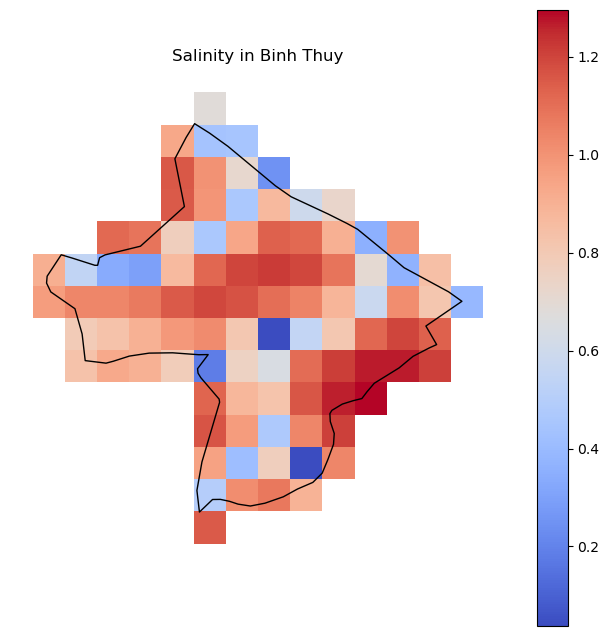

In [5]:
fig, ax = plt.subplots(figsize=(8, 8))
model.polygon_districts.boundary.plot(ax=ax, color='black', linewidth=1)
model.data_salinity.plot(ax=ax, column="Salinity", cmap="coolwarm", legend=True)
plt.title(f"Salinity in {model.district}")
plt.axis("off")
plt.show()

145
145


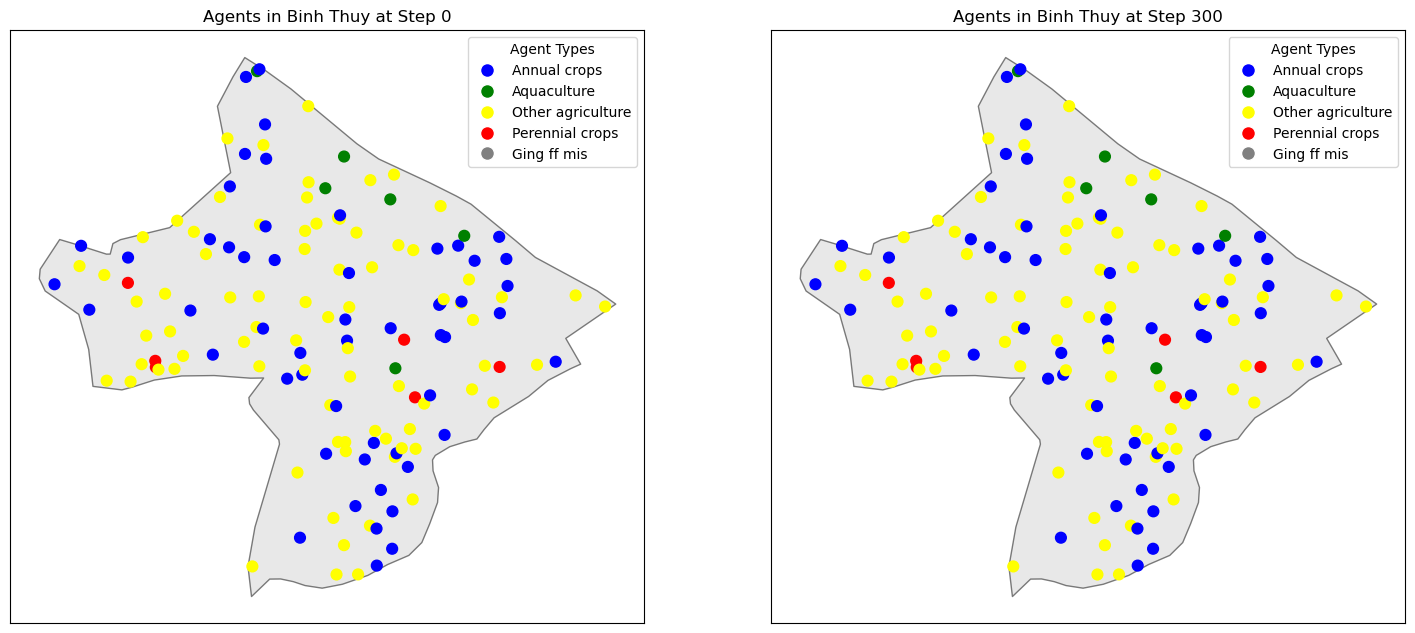

In [6]:
from Model3 import Large_land_households, Middle_land_households, Small_land_households

def plot_network(ax, model):
    ax.clear()

    # Plot district map
    model.polygon_districts.plot(ax=ax, facecolor="lightgray", edgecolor="black", alpha=0.5)

    # Get node positions
    pos = nx.get_node_attributes(model.G, 'pos')

    # Map node_id to agent
    node_to_agent = {
        agent.node_id: agent
        for agent in model.agents
        if isinstance(agent, (Large_land_households, Middle_land_households, Small_land_households))
    }
    print(len(node_to_agent))
    # Prepare lists for nodes and their colors
    nodes_to_draw = []
    colors_to_draw = []

    for node_id in model.G.nodes():
        nodes_to_draw.append(node_id)
        agent = node_to_agent.get(node_id)
        if agent:
            if agent.main_crop == "Annual crops":
                colors_to_draw.append('blue')
            elif agent.main_crop == "Aquaculture":
                colors_to_draw.append('green')
            elif agent.main_crop == "Other agriculture":
                colors_to_draw.append('yellow')
            elif agent.main_crop == "Perennial crops":
                colors_to_draw.append('red')
            else:
                colors_to_draw.append("gray")  # unknown crop
        else:
            colors_to_draw.append("gray")  # migrated / no agent

    # Draw edges first (optional)
    #nx.draw_networkx_edges(model.G, pos, ax=ax, edge_color="gray")

    # Draw nodes with matching colors
    nx.draw_networkx_nodes(model.G, pos,
                           nodelist=nodes_to_draw,
                           node_color=colors_to_draw,
                           node_size=60,
                           ax=ax)

    # Add legend
    blue_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Annual crops')
    green_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='Aquaculture')
    yellow_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Other agriculture')
    red_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=10, label='Perennial crops')
    grey_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Ging ff mis')
    ax.legend(handles=[blue_patch, green_patch, yellow_patch, red_patch, grey_patch], loc='upper right', title='Agent Types')

    ax.set_title(f"Agents in {model.district} at Step {model.steps}", fontsize=12)

    # Call function above to plot the map
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18, 9))
plot_network(ax1, initial_model_state)
plot_network(ax2, model)
plt.show()
